# Практическая работа 5
**Павел Исаенко БПИ20-02**
## Цель
* Знакомсотво с классификацией на основе наивного байесовского классификатора и дерева решений
* Знакомство с методами кросс-валидации
## Ход работы

### 1. Загрузил [набор данных](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download) с kaggle.com, подходящий к задачам классификации.

In [1]:
# !pip install --upgrade pip
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install sklearn

In [2]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

*Импортировал библиотеки*

In [3]:
df = pd.read_csv("DS/data.csv")

*Импортировал датасет*

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### 2. Выполнил классификацию методом навного байесовского классификатора:

In [8]:
df_enc = pd.get_dummies(df, columns=['diagnosis'], drop_first=False, dtype='int64')

df_enc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [9]:
df_enc.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_B                0
diagnosis_M                0
dtype: int64

In [10]:
df_enc.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_B',
       'diagnosis_M'],
      dtype='object')

In [11]:
df_enc.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838,-0.012838


In [12]:
X = df_enc.iloc[:,:30]
Y = df_enc.iloc[:,-1]

In [13]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.25)

In [14]:
nbG = GaussianNB()

In [15]:
# train_x = train_x.to_numpy().reshape(-1, 1)
nbG.fit(train_x, train_y)

GaussianNB()

In [16]:
# test_x = test_x.to_numpy().reshape(-1,1)
pred_y = nbG.predict(test_x)
pred_train_y = nbG.predict(train_x)
pred_proba = nbG.predict_proba(test_x)[:,1]

In [17]:
conMat = confusion_matrix(test_y, pred_y)
cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat)

In [18]:
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))

train_acc 0.9483568075117371
test_acc 0.9370629370629371


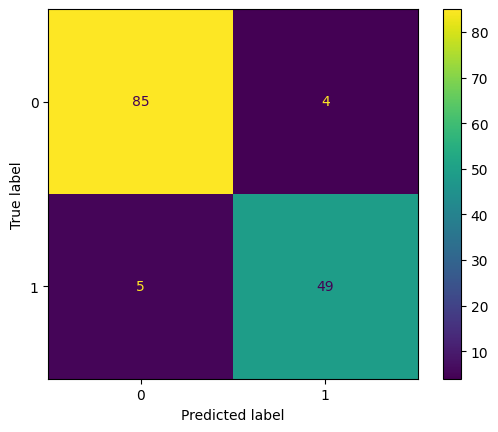

In [19]:
cmDisp.plot()

In [20]:
auc = roc_auc_score(test_y, pred_proba)

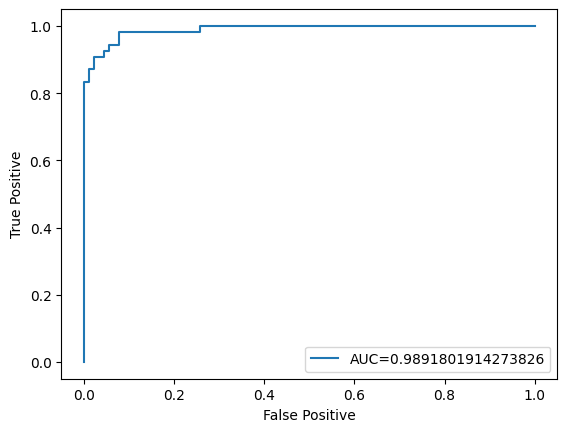

In [21]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [22]:
nbM = MultinomialNB()

In [23]:
nbM.fit(train_x, train_y)

MultinomialNB()

In [24]:
pred_y = nbM.predict(test_x)
pred_train_y = nbM.predict(train_x)
pred_proba = nbM.predict_proba(test_x)[:,-1]

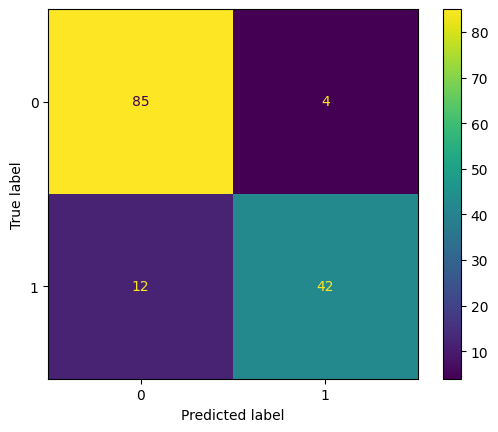

In [25]:
conMat = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(conMat).plot()

In [26]:
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))

train_acc 0.8990610328638498
test_acc 0.8881118881118881


In [27]:
auc = roc_auc_score(test_y, pred_proba)

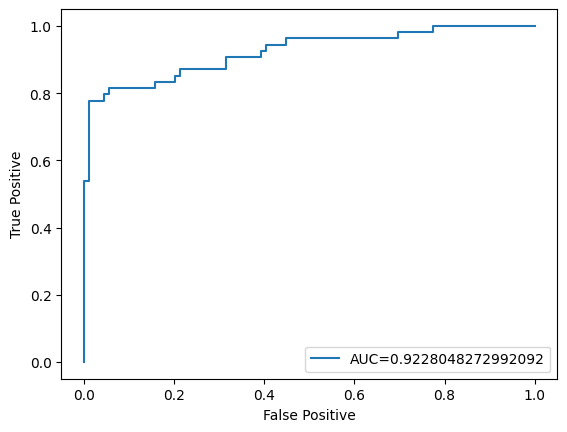

In [28]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [29]:
nbC = ComplementNB()

In [30]:
nbC.fit(train_x, train_y)

ComplementNB()

In [31]:
pred_y = nbC.predict(test_x)
pred_train_y = nbC.predict(train_x)
pred_proba = nbC.predict_proba(test_x)[:,-1]

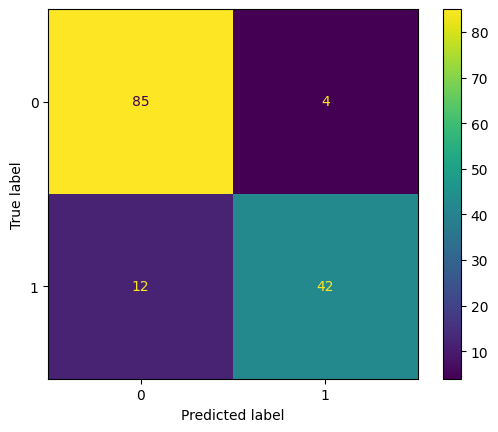

In [32]:
conMat = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(conMat).plot()

In [33]:
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))

train_acc 0.8990610328638498
test_acc 0.8881118881118881


In [34]:
auc = roc_auc_score(test_y, pred_proba)

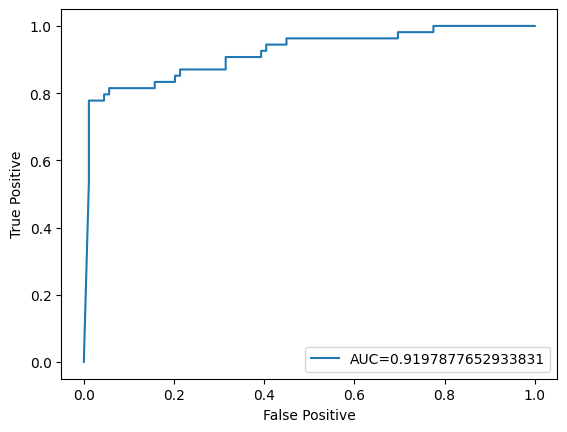

In [35]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [36]:
nbB = BernoulliNB()

train_acc 0.6291079812206573
test_acc 0.6223776223776224


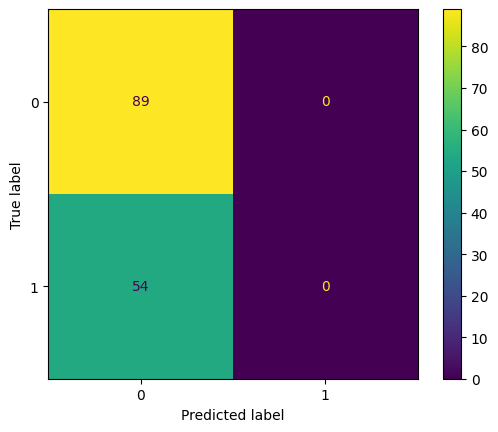

In [37]:
nbB.fit(train_x, train_y)
pred_y = nbB.predict(test_x)
pred_train_y = nbB.predict(train_x)
pred_proba = nbB.predict_proba(test_x)[:,-1]
conMat = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(conMat).plot()
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))
auc = roc_auc_score(test_y, pred_proba)

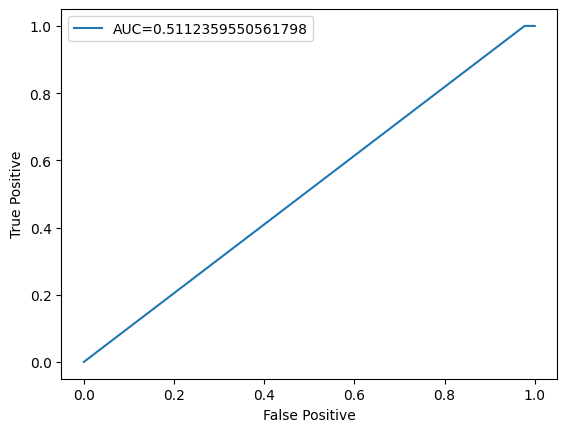

In [38]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

### 3. Выполнил классификацию с использованием дерева решений:

In [39]:
clf = DecisionTreeClassifier( criterion = "entropy", random_state = 43, min_samples_split = 7, min_samples_leaf = 5 )

In [40]:
clf.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=7, random_state=43)

In [41]:
pred_y = clf.predict(test_x)
pred_train_y = clf.predict(train_x)
pred_proba= clf.predict_proba(test_x)[:,-1]

In [42]:
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))

train_acc 0.9765258215962441
test_acc 0.916083916083916


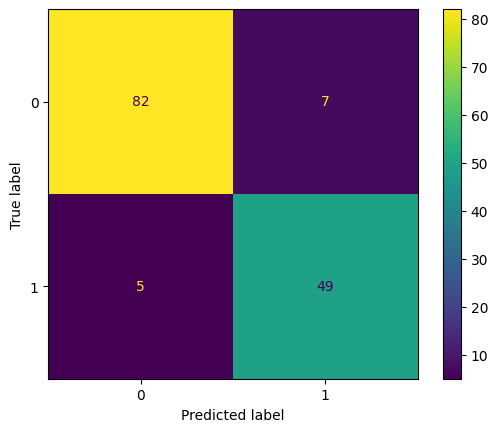

In [43]:
conMat = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(conMat).plot()

In [44]:
auc = roc_auc_score(test_y, pred_proba)

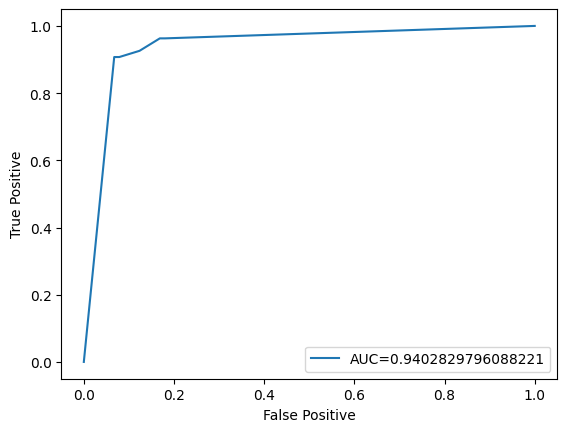

In [45]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [46]:
textDescr = tree.export_text(clf, feature_names = list(df_enc.columns[:30]))
print(textDescr)

|--- concave points_worst <= 0.13
|   |--- radius_worst <= 16.98
|   |   |--- area_se <= 38.60
|   |   |   |--- texture_worst <= 33.27
|   |   |   |   |--- class: 0
|   |   |   |--- texture_worst >  33.27
|   |   |   |   |--- fractal_dimension_worst <= 0.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fractal_dimension_worst >  0.08
|   |   |   |   |   |--- class: 0
|   |   |--- area_se >  38.60
|   |   |   |--- texture_se <= 2.01
|   |   |   |   |--- class: 0
|   |   |   |--- texture_se >  2.01
|   |   |   |   |--- class: 1
|   |--- radius_worst >  16.98
|   |   |--- texture_mean <= 19.22
|   |   |   |--- class: 0
|   |   |--- texture_mean >  19.22
|   |   |   |--- class: 1
|--- concave points_worst >  0.13
|   |--- perimeter_worst <= 114.45
|   |   |--- smoothness_worst <= 0.14
|   |   |   |--- smoothness_se <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- smoothness_se >  0.01
|   |   |   |   |--- class: 0
|   |   |--- smoothness_worst >  0.14
|   |   |   |--- radius

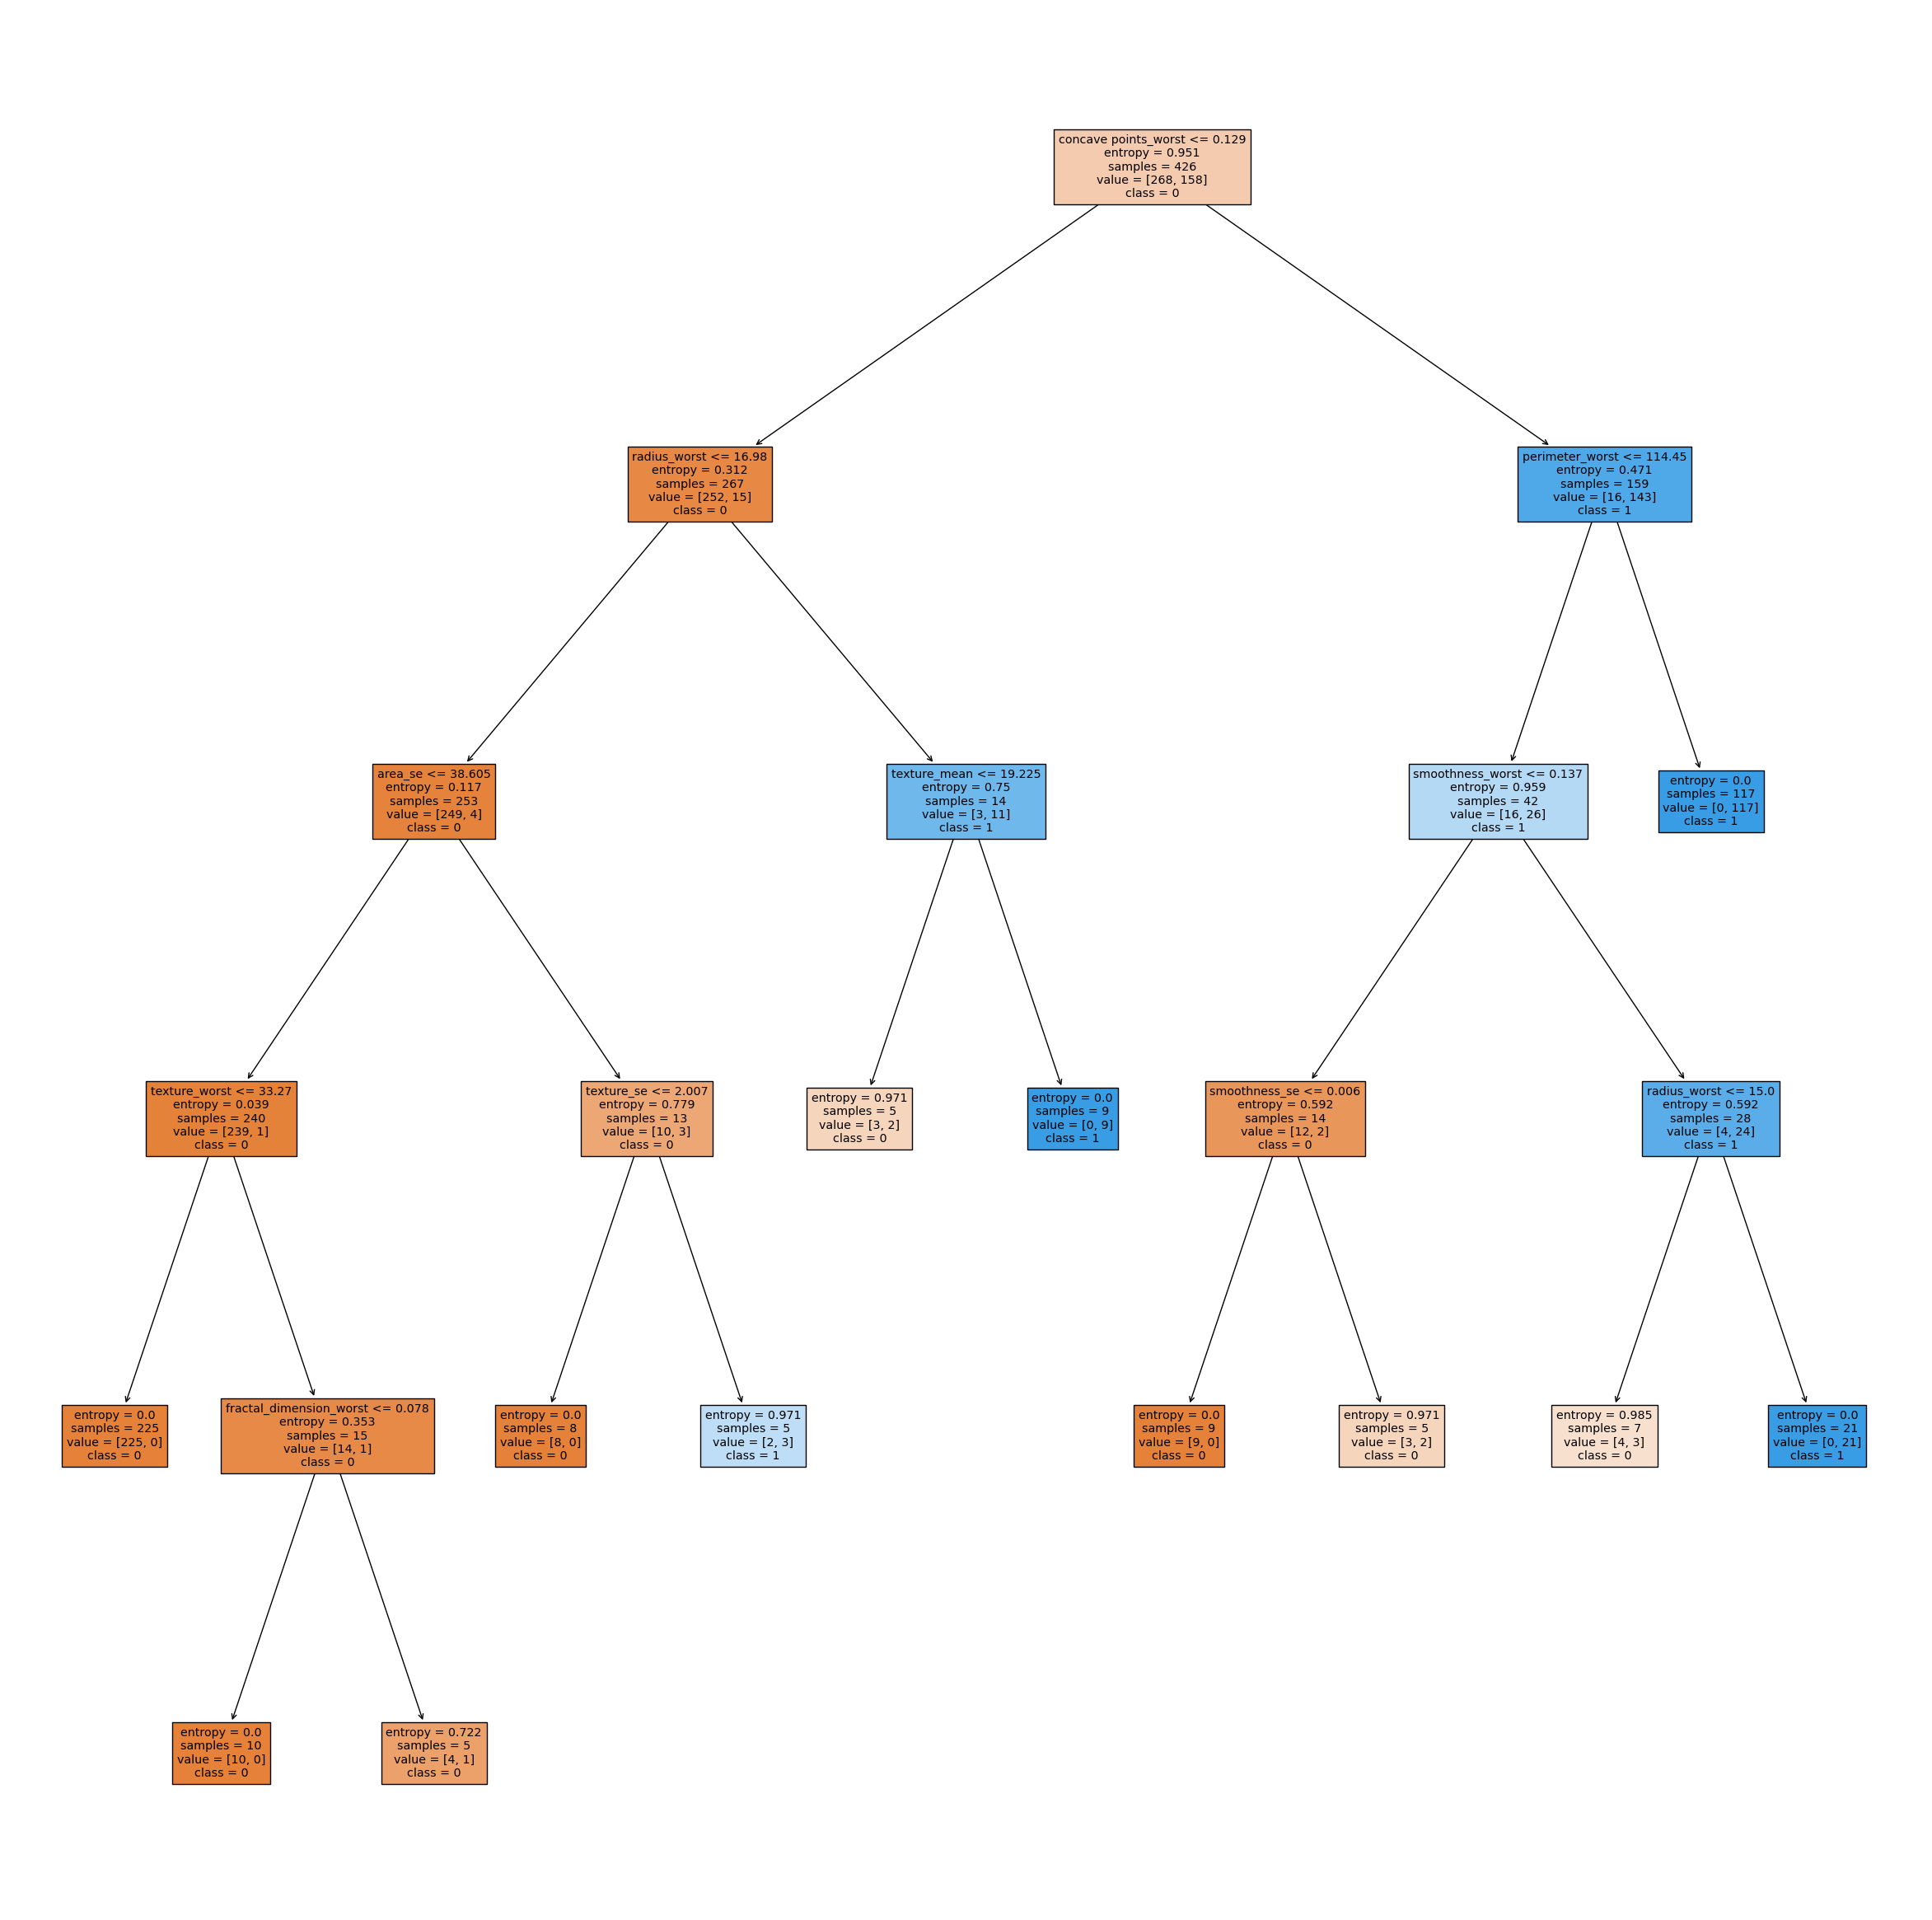

In [47]:
fig = plt.figure(figsize=(30,30))
res = tree.plot_tree(clf, 
                   feature_names = list(df_enc.columns[:30]) ,  
                   class_names = ['0', '1'],
                   filled = True)

### 4. Выполнил кросс-валидацию

+ К-блочная

In [48]:
dtc = DecisionTreeClassifier()
kFold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(dtc, X, Y, cv = kFold)

print(scores)
print(f"В среднем точность классификации моделью: {scores.mean()} со средним разбросом {scores.std()}")

[0.93859649 0.92982456 0.92982456 0.95614035 0.95575221]
В среднем точность классификации моделью: 0.9420276354603322 со средним разбросом 0.011807925575086293


+ Стратифицированная K-блочная

In [49]:
stratifiedKfold = StratifiedKFold(n_splits=5, shuffle = True)
scores = cross_val_score(dtc, X, Y, cv = stratifiedKfold)

print(scores)
print(f"В среднем точность классификации моделью: {scores.mean()} со средним разбросом {scores.std()}")

[0.87719298 0.94736842 0.93859649 0.95614035 0.9380531 ]
В среднем точность классификации моделью: 0.9314702685918336 со средним разбросом 0.027933867205761444
